In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
import time
import math
sys.path.insert(0, '..')

from database.dataset import INBreast_Dataset
import general_utils.utils as utils
from mc_candidate_proposal.morphology_mc import MorphologyCalcificationDetection
from mc_candidate_proposal.hdog_mc import HDoGCalcificationDetection
from mc_candidate_proposal.hough_mc import HoughCalcificationDetection

from tqdm import tqdm
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
from pathlib import Path

import warnings
import seaborn as sns
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

Set the database

In [3]:
db = INBreast_Dataset(
    return_lesions_mask=True,
    level='image',
    max_lesion_diam_mm=None,
    extract_patches=False,
    extract_patches_method='all',  # 'centered'
    normalize=None,
    partitions = ['train'],
    n_jobs=-1,
    lesion_types=['calcification', 'cluster'],
    use_muscle_mask=True
)

Morphology Detection

In [4]:
results_path = Path.cwd().parent.parent / 'data/comparisson_between_detectors/'
results_path.mkdir(exist_ok=True, parents=True)

In [7]:
m_results_path = results_path / 'morphology'
m_results_path.mkdir(exist_ok=True, parents=True)

threshold = 0.97
min_distance = 6
area = 14
results_morphology_complete = []
for threshold in [0.93, 0.95, 0.97, 0.99]:
    result_det = {}
    res = []
    for idx in tqdm(range(len(db)), total=len(db)):
        rbd_path = m_results_path / 'recounstructed_by_dialation_img'
        rbd_path.mkdir(exist_ok=True, parents=True)
        md = MorphologyCalcificationDetection(
            rbd_path, threshold=threshold, min_distance=min_distance,
            area=area*area, store_intermediate=True, filter_muscle_region=True)
        case = db[idx]
        image = case['img']
        image_id = case['img_id']
        lesion_mask = case['lesion_mask']
        muscle_mask = case['muscle_mask']

        start = time.time()
        candidate_blobs = md.detect(image, image_id, muscle_mask)
        t = time.time() - start

        tp, fp, fn = utils.get_tp_fp_fn_center_patch_criteria(
            candidate_blobs, lesion_mask, None, 14)
        
        img_res = {
            'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn),
            'time': t, 'size': image.size, 'threshold': threshold
        }
        
        res.append(img_res)
    results_morphology = pd.DataFrame(res)
    filename = f'md_th-{threshold}_mindist-{min_distance}_area-{area}'
    results_morphology.to_csv(m_results_path/f'{filename}.csv')
    with open(m_results_path/f'{filename}.pkl', 'wb') as f:
        pickle.dump(result_det, f)
    results_morphology_complete.append(results_morphology)
results_morphology_complete = pd.concat(results_morphology_complete, ignore_index=True)
filename = f'md_mindist-{min_distance}_area-{area}_TH'
results_morphology_complete.to_csv(m_results_path/f'{filename}.csv')

100%|██████████| 118/118 [01:08<00:00,  1.73it/s]


In [8]:
m_results_path = results_path / 'morphology'
m_results_path.mkdir(exist_ok=True, parents=True)

threshold = 0.97
min_distance = 6
area = 14
results_morphology_complete = []
for area in [10, 12, 14, 16]:
    result_det = {}
    res = []
    for idx in tqdm(range(len(db)), total=len(db)):
        rbd_path = m_results_path / 'recounstructed_by_dialation_img'
        rbd_path.mkdir(exist_ok=True, parents=True)
        md = MorphologyCalcificationDetection(
            rbd_path, threshold=threshold, min_distance=min_distance,
            area=area*area, store_intermediate=True, filter_muscle_region=True)
        case = db[idx]
        image = case['img']
        image_id = case['img_id']
        lesion_mask = case['lesion_mask']
        muscle_mask = case['muscle_mask']

        start = time.time()
        candidate_blobs = md.detect(image, image_id, muscle_mask)
        t = time.time() - start

        tp, fp, fn = utils.get_tp_fp_fn_center_patch_criteria(
            candidate_blobs, lesion_mask, None, 14)
        
        img_res = {
            'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn),
            'time': t, 'size': image.size, 'area': area
        }
        
        res.append(img_res)
    results_morphology = pd.DataFrame(res)
    filename = f'md_th-{threshold}_mindist-{min_distance}_area-{area}'
    results_morphology.to_csv(m_results_path/f'{filename}.csv')
    with open(m_results_path/f'{filename}.pkl', 'wb') as f:
        pickle.dump(result_det, f)
    results_morphology_complete.append(results_morphology)
results_morphology_complete = pd.concat(results_morphology_complete, ignore_index=True)
filename = f'md_mindist-{min_distance}_threshold-{threshold}_AREA'
results_morphology_complete.to_csv(m_results_path/f'{filename}.csv')

100%|██████████| 118/118 [01:09<00:00,  1.70it/s]


In [9]:
m_results_path = results_path / 'morphology'
m_results_path.mkdir(exist_ok=True, parents=True)

threshold = 0.97
min_distance = 6
area = 14
results_morphology_complete = []
for min_distance in [3, 6, 9]:
    result_det = {}
    res = []
    for idx in tqdm(range(len(db)), total=len(db)):
        rbd_path = m_results_path / 'recounstructed_by_dialation_img'
        rbd_path.mkdir(exist_ok=True, parents=True)
        md = MorphologyCalcificationDetection(
            rbd_path, threshold=threshold, min_distance=min_distance,
            area=area*area, store_intermediate=True, filter_muscle_region=True)
        case = db[idx]
        image = case['img']
        image_id = case['img_id']
        lesion_mask = case['lesion_mask']
        muscle_mask = case['muscle_mask']

        start = time.time()
        candidate_blobs = md.detect(image, image_id, muscle_mask)
        t = time.time() - start

        tp, fp, fn = utils.get_tp_fp_fn_center_patch_criteria(
            candidate_blobs, lesion_mask, None, 14)
        
        img_res = {
            'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn),
            'time': t, 'size': image.size, 'min_distance': min_distance
        }
        
        res.append(img_res)
    results_morphology = pd.DataFrame(res)
    filename = f'md_th-{threshold}_mindist-{min_distance}_area-{area}'
    results_morphology.to_csv(m_results_path/f'{filename}.csv')
    with open(m_results_path/f'{filename}.pkl', 'wb') as f:
        pickle.dump(result_det, f)
    results_morphology_complete.append(results_morphology)
results_morphology_complete = pd.concat(results_morphology_complete, ignore_index=True)
filename = f'md_area-{area}_th-{threshold}_MINDIST'
results_morphology_complete.to_csv(m_results_path/f'{filename}.csv')

100%|██████████| 118/118 [01:09<00:00,  1.71it/s]


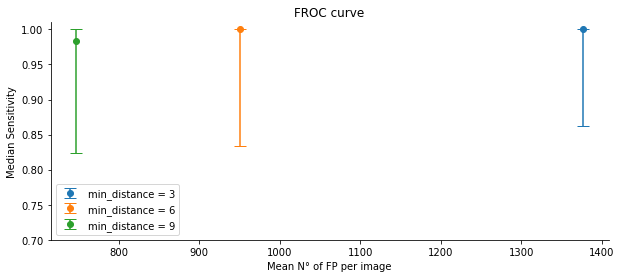

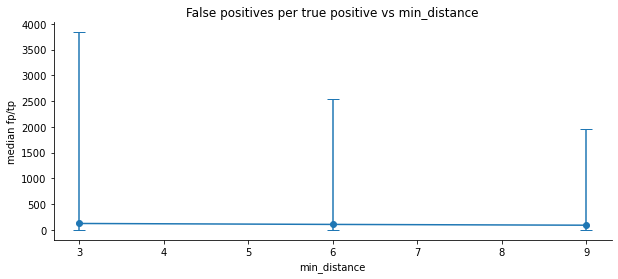

In [10]:
def plots(filename, variable):
    results_morphology_complete = pd.read_csv(m_results_path/f'{filename}.csv')
    results_morphology_complete['FPR'] = results_morphology_complete['FP'] / (results_morphology_complete['FP'] + results_morphology_complete['TP'])
    results_morphology_complete['sens'] = results_morphology_complete['TP'] / (results_morphology_complete['TP'] + results_morphology_complete['FN'])
    results_morphology_complete['fp_per_tp'] = results_morphology_complete['FP'] / (results_morphology_complete['TP'])

    cmap = plt.get_cmap("tab10")

    plt.figure(figsize=(10,4))
    for i in results_morphology_complete[variable].unique():
        subset = results_morphology_complete.loc[results_morphology_complete[variable] == i]
        sens = subset['sens'].median()
        sens_min = np.quantile(subset.sens.values, 0.25)
        sens_max = np.quantile(subset.sens.values, 0.75)
        mfpi = subset['FP'].sum() / len(subset)
        plt.errorbar(mfpi, sens, yerr=[[sens - sens_min], [sens_max - sens]], fmt='o', label=f'{variable} = {i}',capsize=6)
    plt.ylim([0.7,1.01])
    plt.ylabel('Median Sensitivity')
    plt.xlabel('Mean N° of FP per image')
    plt.title('FROC curve')
    plt.legend()
    sns.despine()
    plt.show()

    fp_per_tps = []
    m_d = []
    plt.figure(figsize=(10,4))
    for i in results_morphology_complete[variable].unique():
        selection = (results_morphology_complete[variable] == i) & (results_morphology_complete.TP != 0)
        subset = results_morphology_complete.loc[selection]
        fp_per_tp_min = subset['fp_per_tp'].min()
        fp_per_tp_max = subset['fp_per_tp'].max()
        fp_per_tp = np.median(subset['fp_per_tp'])
        fp_per_tps.append(fp_per_tp)
        m_d.append(i)
        plt.errorbar(i, fp_per_tp, yerr=[[fp_per_tp-fp_per_tp_min], [fp_per_tp_max-fp_per_tp]], fmt='o', color=cmap(0), capsize=6)
    plt.plot(m_d, fp_per_tps, color=cmap(0))
    plt.ylabel('median fp/tp')
    plt.xlabel(f'{variable}')
    plt.title(f'False positives per true positive vs {variable}')
    sns.despine()
    plt.show()

filename = f'md_area-{area}_th-{threshold}_MINDIST'
plots(filename, 'min_distance')


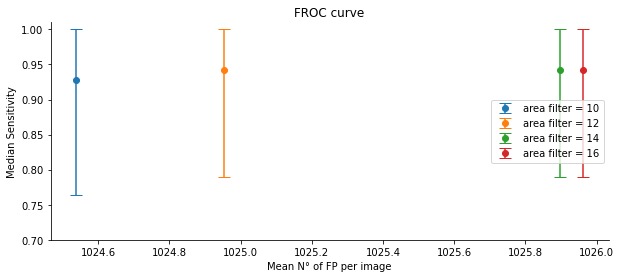

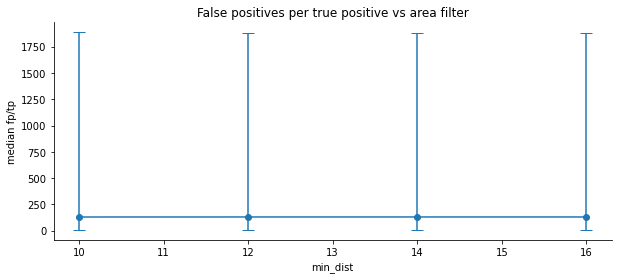

In [36]:
filename = f'md_mindist-{min_distance}_threshold-{threshold}_AREA'
plots(filename, 'area')

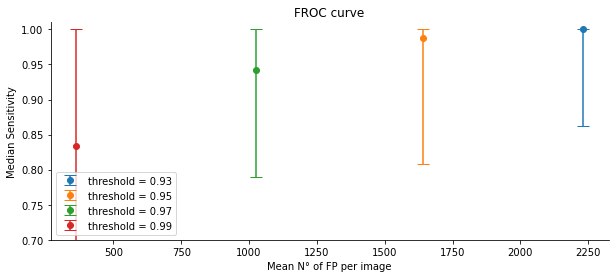

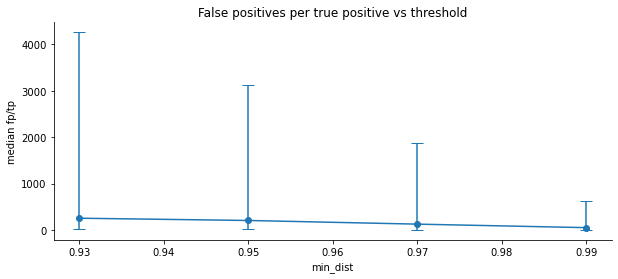

In [38]:
filename = f'md_mindist-{min_distance}_area-{area}_TH'
plots(filename, 'threshold')

Morphology

In [11]:
m_results_path = results_path / 'morphology'
m_results_path.mkdir(exist_ok=True, parents=True)

threshold = 0.97
min_distance = 6
area = 14
result_det = {}
res = []
for idx in tqdm(range(len(db)), total=len(db)):
    rbd_path = m_results_path / 'recounstructed_by_dialation_img'
    rbd_path.mkdir(exist_ok=True, parents=True)

    case = db[idx]
    image = case['img']
    image_id = case['img_id']
    lesion_mask = case['lesion_mask']
    muscle_mask = case['muscle_mask']

    md = MorphologyCalcificationDetection(
        rbd_path, threshold=threshold, min_distance=min_distance,
        area=area*area, store_intermediate=True, filter_muscle_region=True)

    start = time.time()
    candidate_blobs = md.detect(image, image_id, muscle_mask)
    t = time.time() - start

    tp, fp, fn = utils.get_tp_fp_fn_center_patch_criteria(
        candidate_blobs, lesion_mask, None, 14)
    
    img_res = {
        'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'time': t}

    res.append(img_res)
    result_det[image_id] = {'tp': tp, 'fp': fp, 'fn': fn}
results_morphology = pd.DataFrame(res)
filename = f'md_th-{threshold}_mindist-{min_distance}_area-{area}'
results_morphology.to_csv(results_path/f'{filename}.csv')
with open(results_path/f'{filename}.pkl', 'wb') as f:
    pickle.dump(result_det, f)

100%|██████████| 118/118 [13:24<00:00,  6.82s/it]


HDoG

In [5]:
hdog_results_path = results_path / 'HDoG'
hdog_results_path.mkdir(exist_ok=True, parents=True)

processed_imgs_path = hdog_results_path / 'hdog_images'
processed_imgs_path.mkdir(exist_ok=True, parents=True)

detections_path = hdog_results_path / 'hdog_detections'
detections_path.mkdir(exist_ok=True, parents=True)

# Default parameters
dog_parameters = {
    'min_sigma': 1,
    'max_sigma': 3,
    'n_scales': 20,
    'sigma_ratio': None,
    'dog_blob_th': 0.006,
    'dog_overlap': 0.2,
    'dog_min_dist': 6,
}

hessian_parameters = {
    'method': 'eigenval',
    'hessian_threshold': None,
    'hessian_th_divider': 300
}

result_det = {}
res = []

for idx in tqdm(range(len(db)), total=len(db)):
    case = db[idx]
    image = case['img']
    image_id = case['img_id']
    lesion_mask = case['lesion_mask']
    muscle_mask = case['muscle_mask']

    hdogd = HDoGCalcificationDetection(
        dog_parameters, hessian_parameters, processed_imgs_path, detections_path, filter_muscle_region=True)
    
    start = time.time()
    detections = hdogd.detect(image, image_id, False, False, muscle_mask)
    t = time.time() - start

    detections[:, 2] = detections[:, 2]*math.sqrt(2)

    tp, fp, fn = utils.get_tp_fp_fn_center_patch_criteria(detections, lesion_mask, None, 14)
    
    img_res = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'time': t}

    res.append(img_res)
    result_det[image_id] = {'tp': tp, 'fp': fp, 'fn': fn}

results_hdog = pd.DataFrame(res)

ms = dog_parameters['min_sigma']
Ms = dog_parameters['max_sigma']
ns = dog_parameters['n_scales']
ns = dog_parameters['n_scales']
dth = dog_parameters['dog_blob_th']
dovp = dog_parameters['dog_overlap']
dmd = dog_parameters['dog_min_dist']
filename = f'hdog_ms-{ms}_Ms-{Ms}_ns-{ns}_dth-{dth}_dmd-{dmd}'
results_hdog.to_csv(results_path/f'{filename}.csv')
with open(results_path/f'{filename}.pkl', 'wb') as f:
    pickle.dump(result_det, f)

100%|██████████| 118/118 [1:09:56<00:00, 35.56s/it]


Hough

In [6]:
hough_results_path = results_path / 'Hough'
hough_results_path.mkdir(exist_ok=True, parents=True)

processed_imgs_path = hough_results_path / 'hough_images'
processed_imgs_path.mkdir(exist_ok=True, parents=True)

dehazing_params = {'omega': 0.9, 'window_size': 11, 'radius': 40, 'eps': 1e-5}

hough1_params = {'method': cv2.HOUGH_GRADIENT, 'dp': 1, 'minDist': 20,
                 'param1': 300, 'param2': 8,  'minRadius': 2, 'maxRadius': 20}

hough2_params = {'method': cv2.HOUGH_GRADIENT, 'dp': 1, 'minDist': 20,
                 'param1': 300, 'param2': 10,  'minRadius': 2, 'maxRadius': 20}

back_ext_radius = 50
erosion_iter = 20
erosion_size = 5

result_det_h1 = {}
result_det_h2 = {}
res_h1 = []
res_h2 = []

for idx in tqdm(range(len(db)), total=len(db)):
    case = db[idx]
    image = case['img']
    image_id = case['img_id']
    lesion_mask = case['lesion_mask']
    muscle_mask = case['muscle_mask']

    hd = HoughCalcificationDetection(
        dehazing_params, back_ext_radius, processed_imgs_path, hough1_params, hough2_params,
        erosion_iter=erosion_iter, erosion_size=erosion_size, filter_muscle_region=True)

    start = time.time()
    h1_circles, h2_circles = hd.detect(image, image_id,
        load_processed_images=False, hough2=True, muscle_mask=muscle_mask)
    t = time.time() - start

    tp, fp, fn = utils.get_tp_fp_fn_center_patch_criteria(h1_circles, lesion_mask, None, 14)
    result_det_h1[image_id] = {'tp': tp, 'fp': fp, 'fn': fn}
    img_res_h1 = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'time': t}
    res_h1.append(img_res_h1)

    tp, fp, fn = utils.get_tp_fp_fn_center_patch_criteria(h2_circles, lesion_mask, None, 14)
    result_det_h2[image_id] = {'tp': tp, 'fp': fp, 'fn': fn}
    img_res_h2 = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'time': t}
    res_h2.append(img_res_h2)

results_hough_h1 = pd.DataFrame(res_h1)
results_hough_h2 = pd.DataFrame(res_h2)

filename = f'hough_default'
results_hough_h1.to_csv(results_path/f'{filename}_h1.csv')
with open(results_path/f'{filename}_h1.pkl', 'wb') as f:
    pickle.dump(result_det_h1, f)

results_hough_h2.to_csv(results_path/f'{filename}_h2.csv')
with open(results_path/f'{filename}_h2.pkl', 'wb') as f:
    pickle.dump(result_det_h2, f)

100%|██████████| 118/118 [51:20<00:00, 26.11s/it] 


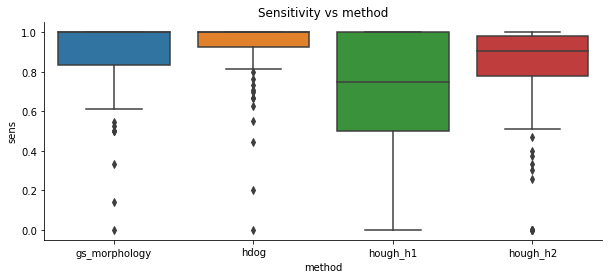

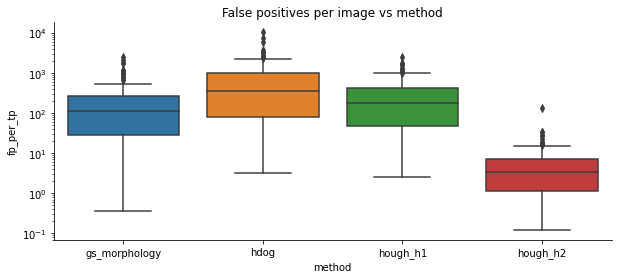

/tmp/ipykernel_4958/3699253032.py:40: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0, 70])


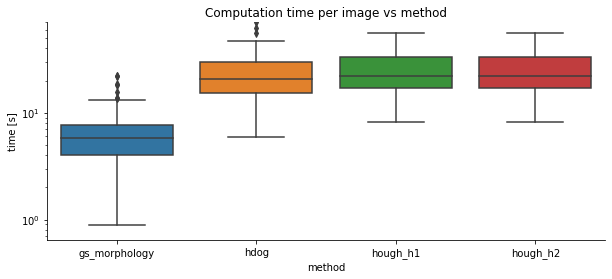

In [7]:
filename = 'md_th-0.97_mindist-6_area-14'
results_morphology = pd.read_csv(results_path/f'{filename}.csv')
results_morphology['method'] = 'gs_morphology'

filename = 'hdog_ms-1_Ms-3_ns-20_dth-0.006_dmd-6'
results_hdog = pd.read_csv(results_path/f'{filename}.csv')
results_hdog['method'] = 'hdog'

results_hough_h1 = pd.read_csv(results_path/'hough_default_h1.csv')
results_hough_h1['method'] = 'hough_h1'
results_hough_h2 = pd.read_csv(results_path/'hough_default_h2.csv')
results_hough_h2['method'] = 'hough_h2'

results = pd.concat([results_morphology, results_hdog, results_hough_h1, results_hough_h2], ignore_index=True)
# results = pd.concat([results_morphology, results_hdog], ignore_index=True)
results['FPR'] = results['FP'] / (results['FP'] + results['TP'])
results['mfpi'] = (results['FP'] / len(results)).sum()
results['sens'] = results['TP'] / (results['TP'] + results['FN'])
results['fp_per_tp'] = results['FP'] / (results['TP'])

plt.figure(figsize=(10, 4))
plt.title('Sensitivity vs method')
sns.boxplot(data=results, x='method', y='sens')
sns.despine()
plt.show()

plt.figure(figsize=(10, 4))
plt.title('False positives per image vs method')
sns.boxplot(data=results, x='method', y='fp_per_tp')
plt.yscale('log')
sns.despine()
plt.show()

plt.figure(figsize=(10, 4))
plt.title('Computation time per image vs method')
sns.boxplot(data=results, x='method', y='time')
plt.yscale('log')
sns.despine()
plt.ylabel('time [s]')
plt.ylim([0, 70])
plt.show()
